In [1]:
%matplotlib notebook 

import autograd.numpy as numpy
import autograd.numpy.random as npr

from autograd import grad

import scipy.optimize
import matplotlib.pyplot as plot

In [2]:
import matplotlib

In [3]:
numpy.random.seed(1234)

In [11]:
# data set generation
n_dim = 2

n_mean1 = numpy.array([-1., -1.])
n_cov1 = numpy.diag([0.5, .5])
n_mean2 = numpy.array([1., 1.])
n_cov2 = numpy.diag([0.5, .5])

p_mean1 = numpy.array([-1., 1.])
p_cov1 = numpy.diag([.5, .5])
p_mean2 = numpy.array([1., -1.])
p_cov2 = numpy.diag([.5, .5])

# generate postive examples
n_pos = 50
pos_y = numpy.ones(n_pos * 2) 
pos_x = numpy.concatenate([npr.randn(n_pos, n_dim) * numpy.diag(p_cov1)[None, :] + p_mean1[None,:],
                           npr.randn(n_pos, n_dim) * numpy.diag(p_cov2)[None, :] + p_mean2[None,:]])
n_pos *= 2
# generate negative examples
n_neg = 50
neg_y = numpy.zeros(n_neg * 2) 
neg_x = numpy.concatenate([npr.randn(n_neg, n_dim) * numpy.diag(n_cov1)[None, :] + n_mean1[None,:],
                           npr.randn(n_neg, n_dim) * numpy.diag(n_cov2)[None, :] + n_mean2[None,:]])
n_neg *= 2
# combine them
y = numpy.concatenate([pos_y, neg_y])
x = numpy.concatenate([pos_x, neg_x], axis=0)
# shuffle them
si = npr.permutation(n_pos + n_neg)
y = y[si]
x = x[si]

# grab training examples
n_tra = numpy.round(0.5 * (n_pos + n_neg)).astype(numpy.int32)

y_tra = y[:n_tra]
x_tra = x[:n_tra]

y_tes = y[n_tra:]
x_tes = x[n_tra:]

In [12]:
def sigmoid(a):
    return 1. / (1. + numpy.exp(-a))

In [13]:
def rbf(x, bases, width=1.):
    return numpy.exp(-(((x[:,None,:] - bases[None,:,:]) ** 2).sum(-1) / width))

In [14]:
def logreg(x, w, pre=False):
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sigmoid(y)

In [15]:
def logreg_dist(y, x, w, avg=False):
    y_ = logreg(x, w)
    
    d = -(y * numpy.log(y_) + (1. - y) * numpy.log(1-y_))
    
    if not avg:
        return d
    return numpy.mean(d)

In [16]:
def cost(w, x, y):
    return logreg_dist(y, x, w, avg=True)

logreg_rule = grad(cost)

In [18]:
def _logreg_dist(w, x, y, avg=False):
    return logreg_dist(y, x, w, avg=avg), logreg_rule(w, x, y)

In [24]:
n_bases = 10
# select random centroids
cids = npr.permutation(len(x_tra))[:n_bases]
centroids = x_tra[cids]
x_tra_ = rbf(x_tra, centroids, 1.)
x_tes_ = rbf(x_tes, centroids, 1.)
print(x_tra_.shape)

(100, 10)


In [30]:
w0 = npr.randn(n_bases+1); w0[-1] = 0.
x_tra__, x_val__ = x_tra_[:80], x_tra_[80:]
y_tra__, y_val__ = y_tra[:80], y_tra[80:]

for i in range(1000000):
    tra_err = cost(w0, x_tra__, y_tra__)
    val_err = cost(w0, x_val__, y_val__)
    dw = logreg_rule(w0, x_tra__, y_tra__)
    w0 = w0 - 1e-3 * dw
    if i % 5000 == 0:
        print(tra_err, val_err)
'''
w = numpy.copy(w0)

try:
    res = scipy.optimize.minimize(_logreg_dist, w0, (x_tra_, y_tra, True), 
                                  method='L-BFGS-B', jac=True, options={'maxls': 100}, callback=_callback)
except StopIteration:
''' 

(0.7214168958744926, 0.9208803217180183)
(0.5998620676549767, 0.7869559480032429)
(0.5332008734956496, 0.7055758033847889)
(0.4857264191482574, 0.6442761886041648)
(0.4485282275007879, 0.5944711530788009)
(0.41789845745896786, 0.5525408017924053)
(0.3919666398040954, 0.5166136887079674)
(0.36965227480639967, 0.48554903379472386)
(0.3502539190622659, 0.4585491657444529)
(0.33327133250814034, 0.4350002797333848)
(0.31832272234642656, 0.41440277003450576)
(0.30510344250903704, 0.39633822186099843)
(0.2933637053492314, 0.3804517899642723)
(0.28289541916802785, 0.36644118893674305)
(0.27352363256979995, 0.3540486732718519)
(0.265100461041704, 0.3430545437425333)
(0.2575004694480403, 0.3332716078264956)
(0.25061699634877754, 0.3245403721301221)
(0.24435914747838977, 0.31672486939913413)
(0.23864930087467778, 0.3097090590165132)
(0.23342102240798318, 0.30339374595509827)
(0.22861731938724028, 0.2976939619408125)
(0.22418917620489426, 0.2925367519691255)
(0.2200943263711986, 0.2878593111138398

(0.11519150108798097, 0.24506227327399482)
(0.11506134019311609, 0.24514591668586486)
(0.11493223152511453, 0.24522909010268398)
(0.11480416137994406, 0.24531179438439757)
(0.11467711629443975, 0.24539403047236621)
(0.1145510830409852, 0.24547579938558464)


"\nw = numpy.copy(w0)\n\ntry:\n    res = scipy.optimize.minimize(_logreg_dist, w0, (x_tra_, y_tra, True), \n                                  method='L-BFGS-B', jac=True, options={'maxls': 100}, callback=_callback)\nexcept StopIteration:\n"

In [13]:
print res
w = res.x

      fun: 0.16078995581633582
 hess_inv: <11x11 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -9.26157777e-07,   4.86066231e-06,  -1.10883159e-06,
        -1.75108032e-06,  -1.79894081e-06,   1.50881334e-07,
        -6.45156611e-06,  -8.59159695e-07,  -1.84050971e-06,
        -2.08864953e-07,   5.15880217e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 108
      nit: 96
   status: 0
  success: True
        x: array([ 18.98300115,  -4.57437447,  -6.24083021,  -3.24515635,
       -73.75813921,  23.75196831,  17.45671935, -10.87575394,
         6.54622266,  -4.35086859,  -0.50732705])


In [14]:
# visualize data 
def vis_data(x, y = None, c='r'):
    if y is None: 
        y = [None] * len(x)
    plot.hold('on')
    for x_, y_ in zip(x, y):
        if y_ is None:
            plot.plot(x_[0], x_[1], 'o', markerfacecolor='none', markeredgecolor=c)
        else:
            plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.hold('off')
    plot.grid('on')

In [15]:
def vis_decision_boundary(w, typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    
    x_ = numpy.linspace(lim0[0], lim0[1], 100)
    y_ = numpy.linspace(lim1[0], lim1[1], 100)
    xx, yy = numpy.meshgrid(x_, y_)
    
    x_tra_ = rbf(numpy.concatenate([xx.ravel()[:,None], yy.ravel()[:,None]], axis=1), centroids, 1.)
    
    pred = logreg(x_tra_, w)
    plt1 = plot.contourf(xx, yy, pred.reshape(xx.shape), cmap=plot.cm.coolwarm, alpha=0.4)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

<IPython.core.display.Javascript object>


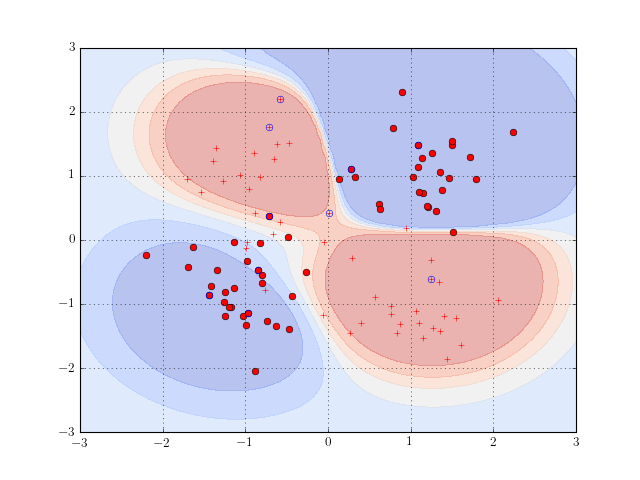

In [16]:
plot.figure()

vis_data(x_tra, y_tra, c='r')
vis_data(centroids, None, c='b')

plt1 = vis_decision_boundary(w, 'k--')

plot.show()

In [17]:
x_tra_ = rbf(x_tra, centroids, 1.)
x_tes_ = rbf(x_tes, centroids, 1.)

tra_er = numpy.sum(numpy.abs(numpy.round(logreg(x_tra_, w)) - y_tra)) / numpy.float(len(y_tra))
tes_er = numpy.sum(numpy.abs(numpy.round(logreg(x_tes_, w)) - y_tes)) / numpy.float(len(y_tes))

print 'Training error rate {}, Test error rate {}'.format(tra_er, tes_er)

Training error rate 0.08, Test error rate 0.07
